# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [52]:
import pandas as pd
import numpy as np

---
## 2. Load data

In [53]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [54]:
df.describe()

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
count,14605.000000,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,...,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,7302.000000,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,...,0.139312,0.051310,0.028568,43.058161,9.483665,6.115566,43.197473,9.534975,6.144134,0.097159
std,4216.244676,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,...,0.024318,0.049501,0.036376,4.668200,12.139506,7.830408,4.683855,12.179014,7.866460,0.296184
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3651.000000,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,...,0.119405,0.000000,0.000000,40.728885,0.000000,0.000000,40.848595,0.000000,0.000000,0.000000
50%,7302.000000,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,...,0.144757,0.084305,0.000000,44.355820,0.000000,0.000000,44.502379,0.084305,0.000000,0.000000
75%,10953.000000,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,...,0.147983,0.100491,0.073719,44.444710,24.437330,16.291555,44.592310,24.537821,16.365180,0.000000
max,14604.000000,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,...,0.276238,0.196029,0.103502,59.444710,36.490689,17.291555,59.720948,36.610036,17.382386,1.000000


In [55]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [56]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Creating new variables

In [57]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [58]:

for i in ['price_peak_var','price_mid_peak_var','price_peak_fix','price_mid_peak_fix']:
    monthly_price_by_id = price_df.groupby(['id','price_date']).agg({f'{i}':'mean'}).reset_index()
    jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
    dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
    diff_dec_jan = pd.merge(left=jan_prices,right=dec_prices,on='id',how='inner')
    diff_dec_jan[f'diff_dec_jan_{i}'] = dec_prices[f'{i}'] - jan_prices[f'{i}']
    diff = diff.merge(right=diff_dec_jan[['id',f'diff_dec_jan_{i}']],on='id',how='left')
diff.head()


,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,diff_dec_jan_price_peak_var,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,-0.002302,0.003487,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,-0.005120,0.000763,0.097749,0.065166
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000


In [59]:
df['tenure'] = df['date_end'].dt.year - df['date_activ'].dt.year
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,tenure
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,3
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,7
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,6
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,6
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,6


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable,output_variable , if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,output_variable]).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns= output_variable, values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

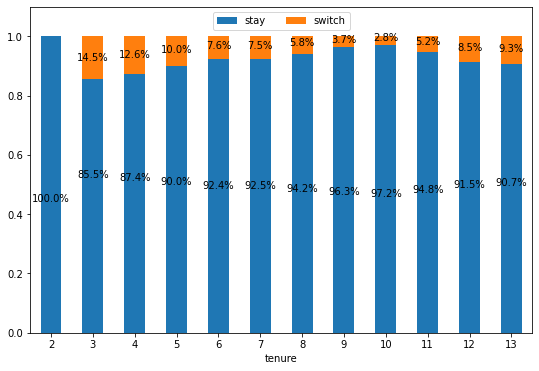

In [61]:
plot_stacked_bar_with_percent_label_by_churn(df= df ,target_variable='tenure',output_variable='churn')

In [62]:
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_6m['mean_6m_price_p1'] = mean_6m['price_off_peak_var'] + mean_6m['price_off_peak_fix']
mean_6m['mean_6m_price_p2'] = mean_6m['price_peak_var'] + mean_6m['price_peak_fix']
mean_6m['mean_6m_price_p3'] = mean_6m['price_mid_peak_var'] + mean_6m['price_mid_peak_fix']
print(mean_6m.shape)
mean_6m.head()



(16096, 10)


,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000


In [63]:
mean_3m = price_df[price_df['price_date']>'2015-09-01'].groupby(['id']).mean().reset_index()
mean_3m['mean_3m_price_p1'] = mean_3m['price_off_peak_var'] + mean_3m['price_off_peak_fix']
mean_3m['mean_3m_price_p2'] = mean_3m['price_peak_var'] + mean_3m['price_peak_fix']
mean_3m['mean_3m_price_p3'] = mean_3m['price_mid_peak_var'] + mean_3m['price_mid_peak_fix']
print(mean_3m.shape)
mean_3m.head()

(16096, 10)


,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [64]:
df.columns

Index(['Unnamed: 0', 'id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var', 'mean_6m_price_p3_var',
       'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_p

In [65]:
from datetime import datetime
df['months_active'] = (( df['date_end']-df['date_activ'])/np.timedelta64(1,'M')).astype(int)


In [66]:

reference_date = datetime(2016,1,1)
def calculate_date(reference_date,data,column):
    months = ((reference_date - data[column])/np.timedelta64(1,'M')).astype(int)
    return months
df['months_modif'] = calculate_date(reference_date,df,column = 'date_modif_prod')
df['months_renew'] = calculate_date(reference_date,df,column = 'date_renewal')
df.drop(columns =['date_end','date_activ','date_modif_prod','date_renewal'],inplace = True)

In [67]:
final_df = pd.merge(left=df[['id', 'channel_sales', 'cons_12m', 'cons_gas_12m','cons_last_month','months_active','months_modif','months_renew',
'has_gas', 'imp_cons','margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
'net_margin', 'num_years_antig', 'origin_up', 'pow_max','mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3','mean_6m_price_p1', 'mean_6m_price_p2',
'mean_6m_price_p3','mean_3m_price_p1', 'mean_3m_price_p2', 'mean_3m_price_p3', 'churn','tenure']],right= diff,on = 'id',how = 'inner')
final_df.drop(columns=['id'],inplace=True)

## Feature encoding

In [68]:
mapping = {'t':1,'f':0}
final_df['has_gas'] = final_df['has_gas'].map(mapping)
final_df = pd.get_dummies(data= final_df,columns=['channel_sales','origin_up'],drop_first=True) 


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [70]:
x = final_df.iloc[:,final_df.columns != 'churn']
y = final_df['churn']

In [71]:
from scipy.stats import f_oneway
# Separate the independent variables (features) and the binary target variable
independent_vars = x
binary_target = y

# Perform the F-test for each independent variable
results_df = pd.DataFrame(columns=['Variable', 'F_Statistic', 'P_Value', 'Significant'])

# Perform the F-test for each independent variable
for column in independent_vars.columns:
    group1 = independent_vars[column][binary_target == 0]
    group2 = independent_vars[column][binary_target == 1]
    
    f_statistic, p_value = f_oneway(group1, group2)
    is_significant = p_value < 0.05  # Check if p-value is significant
    
    results_df = results_df.append({'Variable': column, 'F_Statistic': f_statistic,
                                    'P_Value': p_value, 'Significant': is_significant},
                                    ignore_index=True)
results_df.head()

C:\Users\riddh\AppData\Local\Temp\ipykernel_9712\2872018044.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': column, 'F_Statistic': f_statistic,
C:\Users\riddh\AppData\Local\Temp\ipykernel_9712\2872018044.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': column, 'F_Statistic': f_statistic,
C:\Users\riddh\AppData\Local\Temp\ipykernel_9712\2872018044.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': column, 'F_Statistic': f_statistic,
C:\Users\riddh\AppData\Local\Temp\ipykernel_9712\2872018044.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

,Variable,F_Statistic,P_Value,Significant
0,cons_12m,30.93015,0.0,True
1,cons_gas_12m,21.066395,0.000004,True
2,cons_last_month,30.015239,0.0,True
3,months_active,80.392734,0.0,True
4,months_modif,39.821122,0.0,True


In [72]:
from sklearn.feature_selection import f_regression, SelectKBest

independent_vars = x.select_dtypes(include=['int', 'float','uint8'])
binary_target = y
# Remove any rows with missing values if needed
independent_vars = independent_vars.dropna()
binary_target = binary_target[independent_vars.index]

# Create a SelectKBest instance
fs = SelectKBest(score_func=f_regression, k='all')

# Fit the feature selector on your data
fit = fs.fit(independent_vars, binary_target)

# Prepare feature score DataFrame
features_score = pd.DataFrame({'F_Score': fit.scores_}, index=independent_vars.columns)
features_pvalue = pd.DataFrame({'P_Value': fit.pvalues_}, index=independent_vars.columns)
feature_score = pd.concat([features_score, features_pvalue], axis=1)
feature_score['Significant'] = feature_score['P_Value'] < 0.05
# Sort the DataFrame by p-value in ascending order
feature_score.sort_values(by='P_Value', ascending=True, inplace=True)

# Display the results
feature_score


,F_Score,P_Value,Significant
margin_net_pow_ele,135.204538,4.083875e-31,True
margin_gross_pow_ele,135.072230,4.362616e-31,True
origin_up_lxidpiddsbxsbosboudacockeimpuepw,130.623157,4.020157e-30,True
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,95.919942,1.403922e-22,True
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,84.817481,3.709966e-20,True
num_years_antig,80.782539,2.824161e-19,True
tenure,80.404811,3.415467e-19,True
months_active,80.392734,3.436290e-19,True
channel_sales_lmkebamcaaclubfxadlmueccxoimlema,41.065168,1.517523e-10,True
months_modif,39.821122,2.863494e-10,True


## train-test Split

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score,precision_score,classification_report,recall_score,fbeta_score

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=40,stratify=y)

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 40)

In [76]:
x_smote,y_smote = smote.fit_resample(x_train,y_train)
x_test,y_test = smote.fit_resample(x_test,y_test)

In [77]:
print('X_train size :',x_train.shape)
print('y_train size :',y_train.shape)
print('X_test size :',x_test.shape)
print('y_test size :',y_test.shape)

X_train size : (10953, 42)
y_train size : (10953,)
X_test size : (6594, 42)
y_test size : (6594,)


In [78]:
forest = RandomForestClassifier(random_state=40,n_estimators=100)

In [79]:
forest.fit(x_smote,y_smote)

RandomForestClassifier(random_state=40)

In [80]:
y_pred = forest.predict(x_test)

In [81]:
confusion_matrix(y_true=y_test,y_pred=y_pred,normalize='true') 

array([[0.98574462, 0.01425538],
       [0.18168032, 0.81831968]])

In [82]:
print(confusion_matrix(y_test,y_pred,normalize = 'true'))
print('accuracy score:',accuracy_score(y_test,y_pred))
print('recall score:',recall_score(y_test,y_pred))
print('precision score:',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0.98574462 0.01425538]
 [0.18168032 0.81831968]]
accuracy score: 0.9020321504397938
recall score: 0.8183196845617228
precision score: 0.9828779599271402
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3297
           1       0.98      0.82      0.89      3297

    accuracy                           0.90      6594
   macro avg       0.91      0.90      0.90      6594
weighted avg       0.91      0.90      0.90      6594



In [83]:
features = pd.DataFrame({'features':x.columns,'importance':forest.feature_importances_})
features = features.sort_values('importance',ascending=False)
features

,features,importance
3,months_active,0.050630
20,mean_3m_price_p1,0.044867
17,mean_6m_price_p1,0.043721
15,mean_year_price_p2,0.042658
38,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,0.042640
21,mean_3m_price_p2,0.039784
25,offpeak_diff_dec_january_power,0.039555
18,mean_6m_price_p2,0.039212
0,cons_12m,0.038658
13,pow_max,0.038303


Text(0.5, 0, 'Importance')

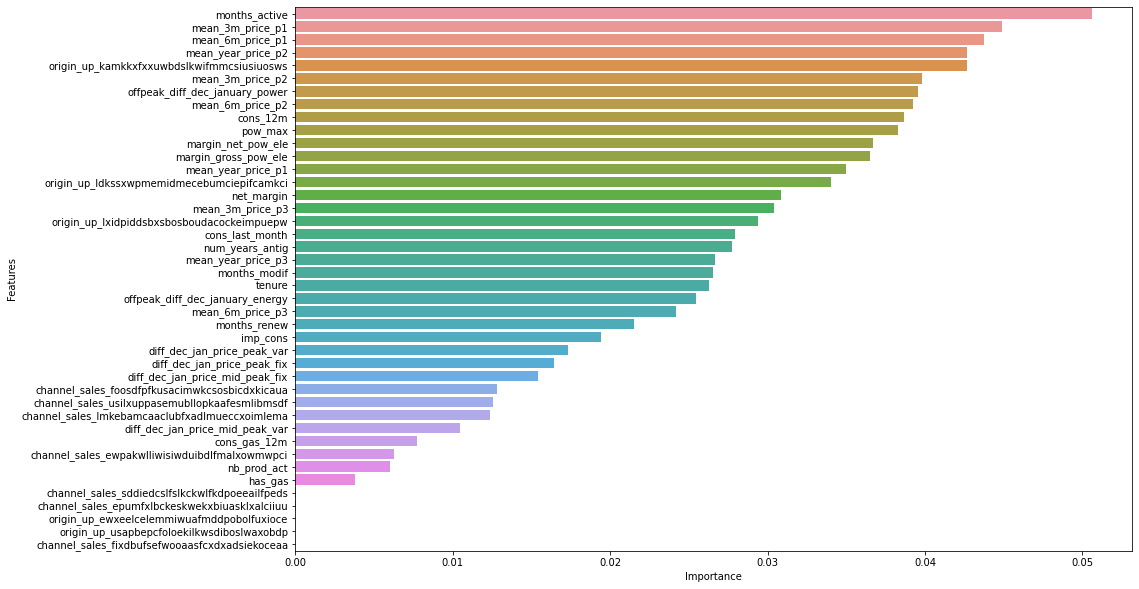

In [84]:
plt.figure(figsize=(15,10))
sns.barplot(data=features,x='importance',y ='features')
plt.ylabel('Features')
plt.xlabel('Importance')

## Taking only significant variables

In [85]:
results_df.loc[results_df['Significant'] == True]['Variable'].values


array(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'months_active',
       'months_modif', 'has_gas', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'net_margin', 'num_years_antig', 'pow_max',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1', 'mean_6m_price_p2', 'mean_6m_price_p3',
       'mean_3m_price_p2', 'mean_3m_price_p3', 'tenure',
       'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
       'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw'], dtype=object)

In [86]:
final_df = final_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'months_active','months_modif', 'has_gas', 'margin_gross_pow_ele','margin_net_pow_ele', 
'net_margin', 'num_years_antig', 'pow_max','mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3','mean_6m_price_p1', 'mean_6m_price_p2',
'mean_6m_price_p3','mean_3m_price_p2', 'mean_3m_price_p3', 'tenure','channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
'channel_sales_lmkebamcaaclubfxadlmueccxoimlema','origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws','origin_up_ldkssxwpmemidmecebumciepifcamkci',
'origin_up_lxidpiddsbxsbosboudacockeimpuepw','churn']]

In [87]:
x = final_df.iloc[:,final_df.columns != 'churn']
y = final_df['churn']

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=40,stratify=y)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 40)
x_smote,y_smote = smote.fit_resample(x_train,y_train)
x_test,y_test = smote.fit_resample(x_test,y_test)

In [89]:
forest = RandomForestClassifier(random_state=40,n_estimators=100)
forest.fit(x_smote,y_smote)
y_pred = forest.predict(x_test)

In [90]:
print(confusion_matrix(y_test,y_pred,normalize = 'true'))
print('accuracy score:',accuracy_score(y_test,y_pred))
print('recall score:',recall_score(y_test,y_pred))
print('precision score:',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0.97725205 0.02274795]
 [0.19957537 0.80042463]]
accuracy score: 0.8888383378829239
recall score: 0.8004246284501062
precision score: 0.9723655121591747
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3297
           1       0.97      0.80      0.88      3297

    accuracy                           0.89      6594
   macro avg       0.90      0.89      0.89      6594
weighted avg       0.90      0.89      0.89      6594



In [91]:
features = pd.DataFrame({'features':x.columns,'importance':forest.feature_importances_})
features = features.sort_values('importance',ascending=False)
features

,features,importance
3,months_active,0.065099
17,mean_3m_price_p2,0.055606
15,mean_6m_price_p2,0.053689
14,mean_6m_price_p1,0.053137
22,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,0.052940
0,cons_12m,0.051383
10,pow_max,0.051327
11,mean_year_price_p1,0.050657
12,mean_year_price_p2,0.048329
23,origin_up_ldkssxwpmemidmecebumciepifcamkci,0.046024


Text(0.5, 0, 'Importance')

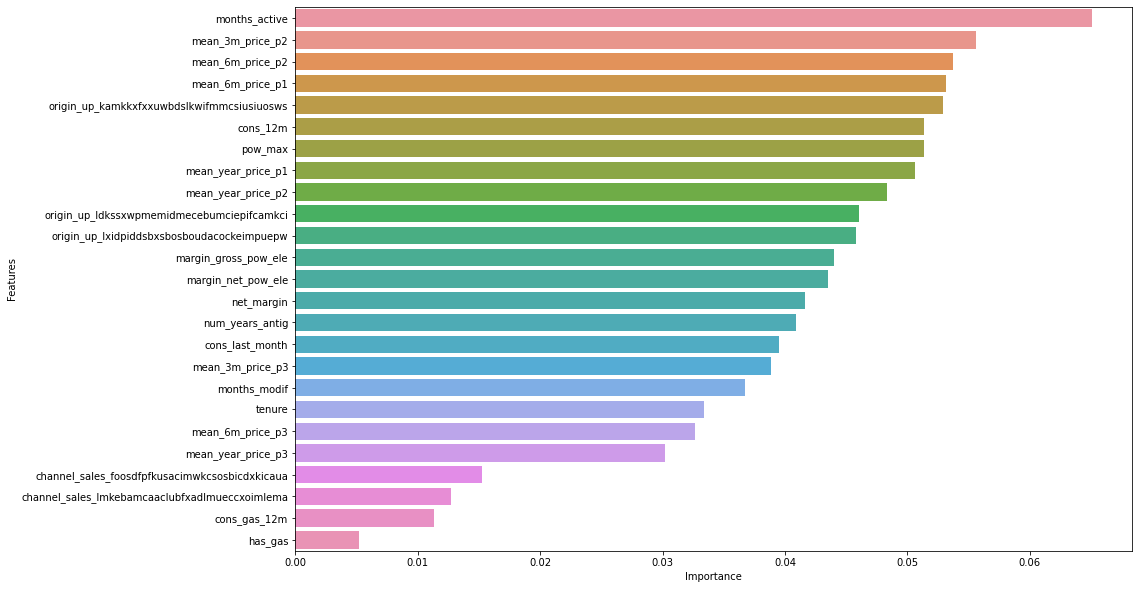

In [92]:
plt.figure(figsize=(15,10))
sns.barplot(data=features,x='importance',y ='features')
plt.ylabel('Features')
plt.xlabel('Importance')

Tuning the model

In [93]:
# values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
# #values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
# #values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
# #values = ['gini', 'entropy'] # criterion
# #values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
# #values = ['auto', 'sqrt', 'log2'] #max_features

# train_score = []
# test_score = []

# for x in values :
#     model_rf_tunned = RandomForestClassifier(max_depth=x, random_state=123)
#     model_rf_tunned.fit(x_smote,y_smote)
    
#     # eval on train
#     y_pred_train_rf = model_rf_tunned.predict(x_train)
#     train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
#     train_score.append(train_rf)
    
#     # eval on test
#     y_pred_test_rf = model_rf_tunned.predict(x_test)
#     test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
#     test_score.append(test_rf)
    
#     print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
# plt.plot(values, train_score, label='Train')
# plt.plot(values, test_score, label='Test')
# plt.legend()
# plt.show()

max_depth = 15 

In [94]:
# #values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
# values = [int(x) for x in list(range(2,100,3))] # min_samples_split
# #values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
# #values = ['gini', 'entropy'] # criterion
# #values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
# #values = ['auto', 'sqrt', 'log2'] #max_features

# train_score = []
# test_score = []

# for x in values :
#     model_rf_tunned = RandomForestClassifier(max_depth=15, random_state=123,min_samples_split=x)
#     model_rf_tunned.fit(x_smote,y_smote)
    
#     # eval on train
#     y_pred_train_rf = model_rf_tunned.predict(x_train)
#     train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
#     train_score.append(train_rf)
    
#     # eval on test
#     y_pred_test_rf = model_rf_tunned.predict(x_test)
#     test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
#     test_score.append(test_rf)
    
#     print('min_samples_split: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
# results = pd.DataFrame({'values':values,'train_score':train_score,'test_score':test_score})
# plt.plot(values, train_score, label='Train')
# plt.plot(values, test_score, label='Test')
# plt.legend()
# plt.show()

min_sample_splits = 8

In [95]:
model_rf_tunned = RandomForestClassifier(max_depth=15, random_state=40,min_samples_split=8)
model_rf_tunned.fit(x_smote,y_smote)
y_pred = model_rf_tunned.predict(x_test)
print(confusion_matrix(y_test,y_pred,normalize = 'true'))
print('accuracy score:',accuracy_score(y_test,y_pred))
print('recall score:',recall_score(y_test,y_pred))
print('precision score:',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0.97573552 0.02426448]
 [0.19168941 0.80831059]]
accuracy score: 0.8920230512587201
recall score: 0.808310585380649
precision score: 0.970856102003643
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      3297
           1       0.97      0.81      0.88      3297

    accuracy                           0.89      6594
   macro avg       0.90      0.89      0.89      6594
weighted avg       0.90      0.89      0.89      6594



## Insights from the model
1. Here from the random forest model the variables such as month active, mean prices of 3 months and 6 months etc. are most important
2. In the variable tenure we can see that the customers who have stayed for more than 3 years churn comparitavley less than new customers
3. From the feature importance graph we can see that most of price variables are importat.

## Conclusion :
1. The performance of the model is quite good for predicting the customer's that are  not churning but it works mediocore in predicting the customer's that are going to churn. This may be due data imbalanceness as very less data for the customer's that churn is available. This problem can be easily solved by using synthetic data as seen we have tried it or if we get more actual data for those who have churned.
2. We use Confusion metric, accuracy score, precision score to check the accuracy of the model. The confusion metric tells us how good our model can actually predict the outcome on the basis of data provided and will compare it with the actual data. Accuracy score and precision score tells us the prediction power of our data. In our case the accuracy score and precision score of the model is 89% and 97%.
3. The models performance is satisfactory as per avaibility of the data it can be imporved with the help of more data avaibility especially for the customer's that churn   
